In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = [10.0, 5.0]
plt.rcParams['figure.dpi'] = 220

In [2]:
def rand_signal_generator(len):
    times = np.arange(0, len)
    signal = np.sin(times) + np.random.normal(scale=0.1, size=times.size) 
    return signal

In [3]:
def generate_block(input_data, seed_vector, m, n):
    meas_mat = np.zeros((m, n), dtype=np.float32)
    for idx, seed in enumerate(seed_vector):
        seed_int = np.asarray(seed, dtype=np.float32).view(np.uint32)
        meas_mat[idx] = np.random.RandomState(seed_int).binomial(1, .5, n) * 2 - 1
    meas_mat /= np.sqrt(m)
    out_data = meas_mat.dot(input_data)
    return out_data, meas_mat

In [4]:
dataset_path = "./datasets/extrasensory/"
sample_names = os.listdir(dataset_path)[:]

In [5]:
m = 8
y = np.arange(0, m, dtype=np.float32)
cs_blockchain = np.zeros((len(sample_names), m))
sample_list = []
for idx, sample_name in enumerate(sample_names):
    sample = np.loadtxt(dataset_path + sample_name)[:, 3]
    sample_list.append(sample)
    n = sample.size
    y, _ = generate_block(sample, y, m, n)
    cs_blockchain[idx] = y 

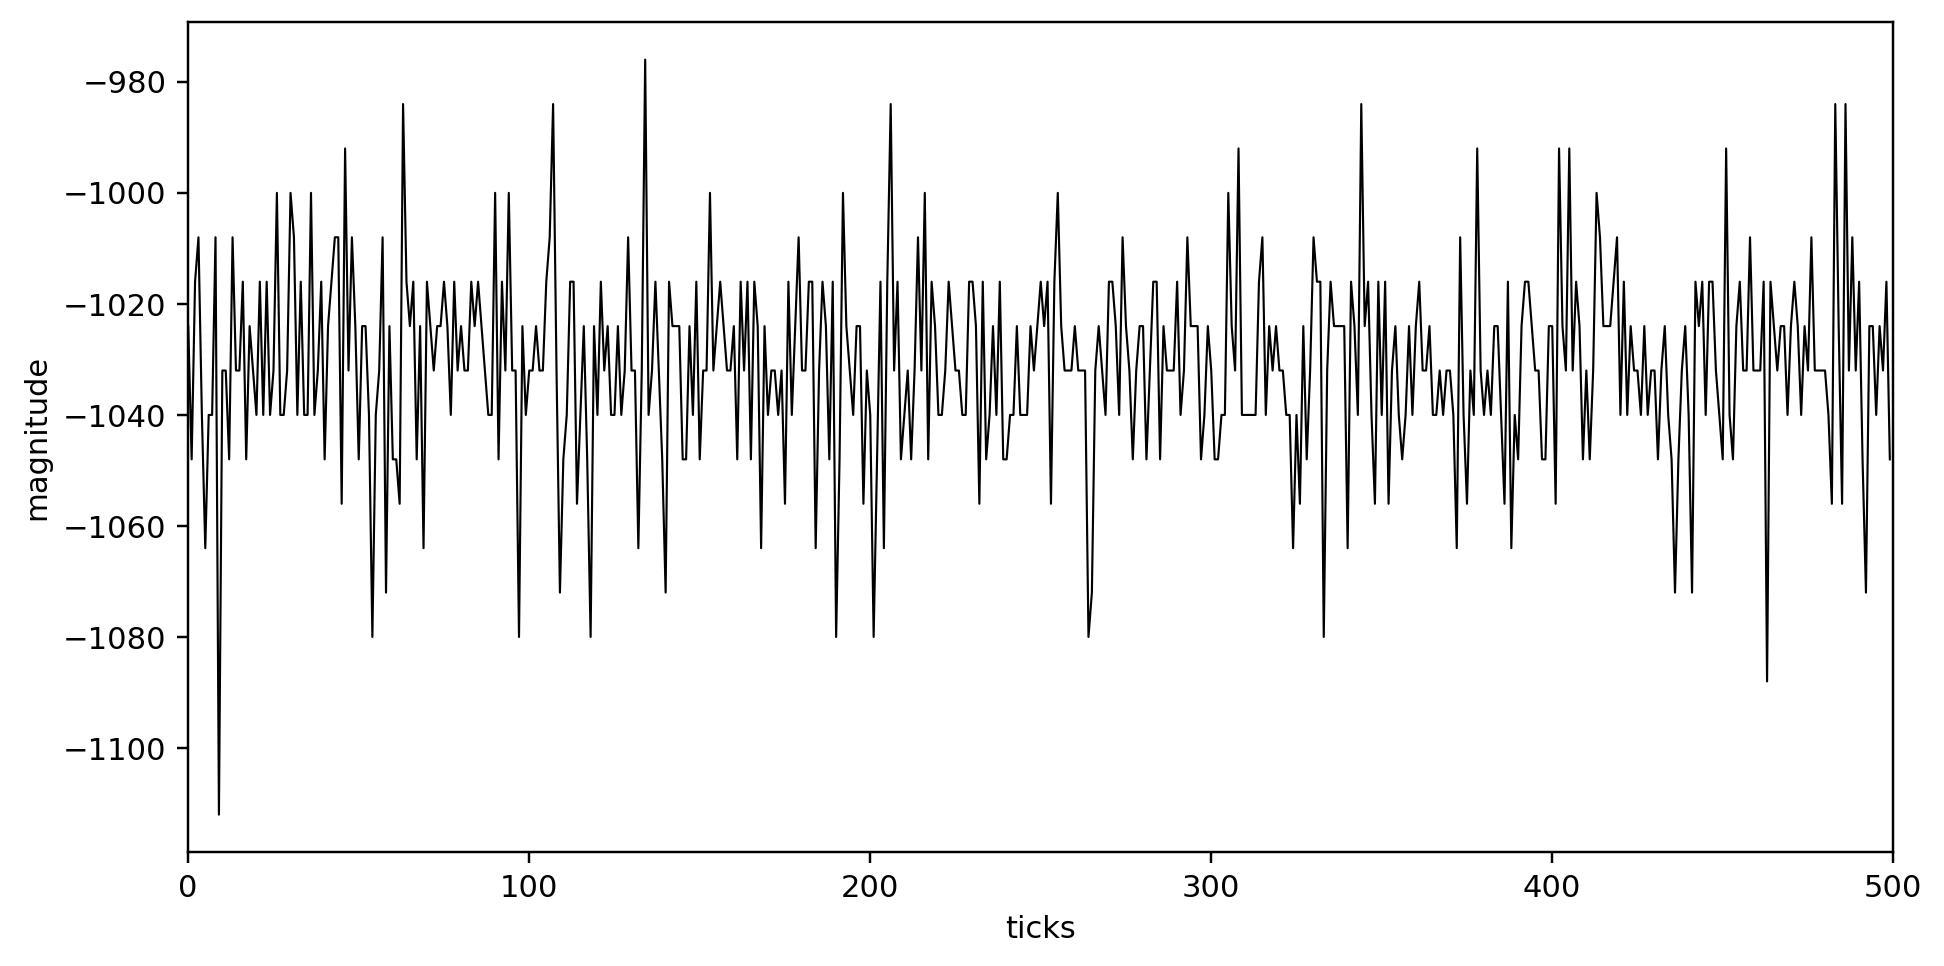

In [6]:
sample = sample_list[0]
plt.plot(sample, "k", linewidth=.7)
plt.xlim([0, len(sample)])
plt.xlabel("ticks")
plt.ylabel("magnitude")
plt.show()

In [18]:
cs_blockchain_frauded = np.zeros_like(cs_blockchain)
fraud_idx = 100
y = np.arange(0, m, dtype=np.float32)
for idx, sample in enumerate(sample_list):
    n = sample.size
    y, _ = generate_block(sample, y, m, n)
    if idx == fraud_idx:
        y += 1e-1
    cs_blockchain_frauded[idx] = y 

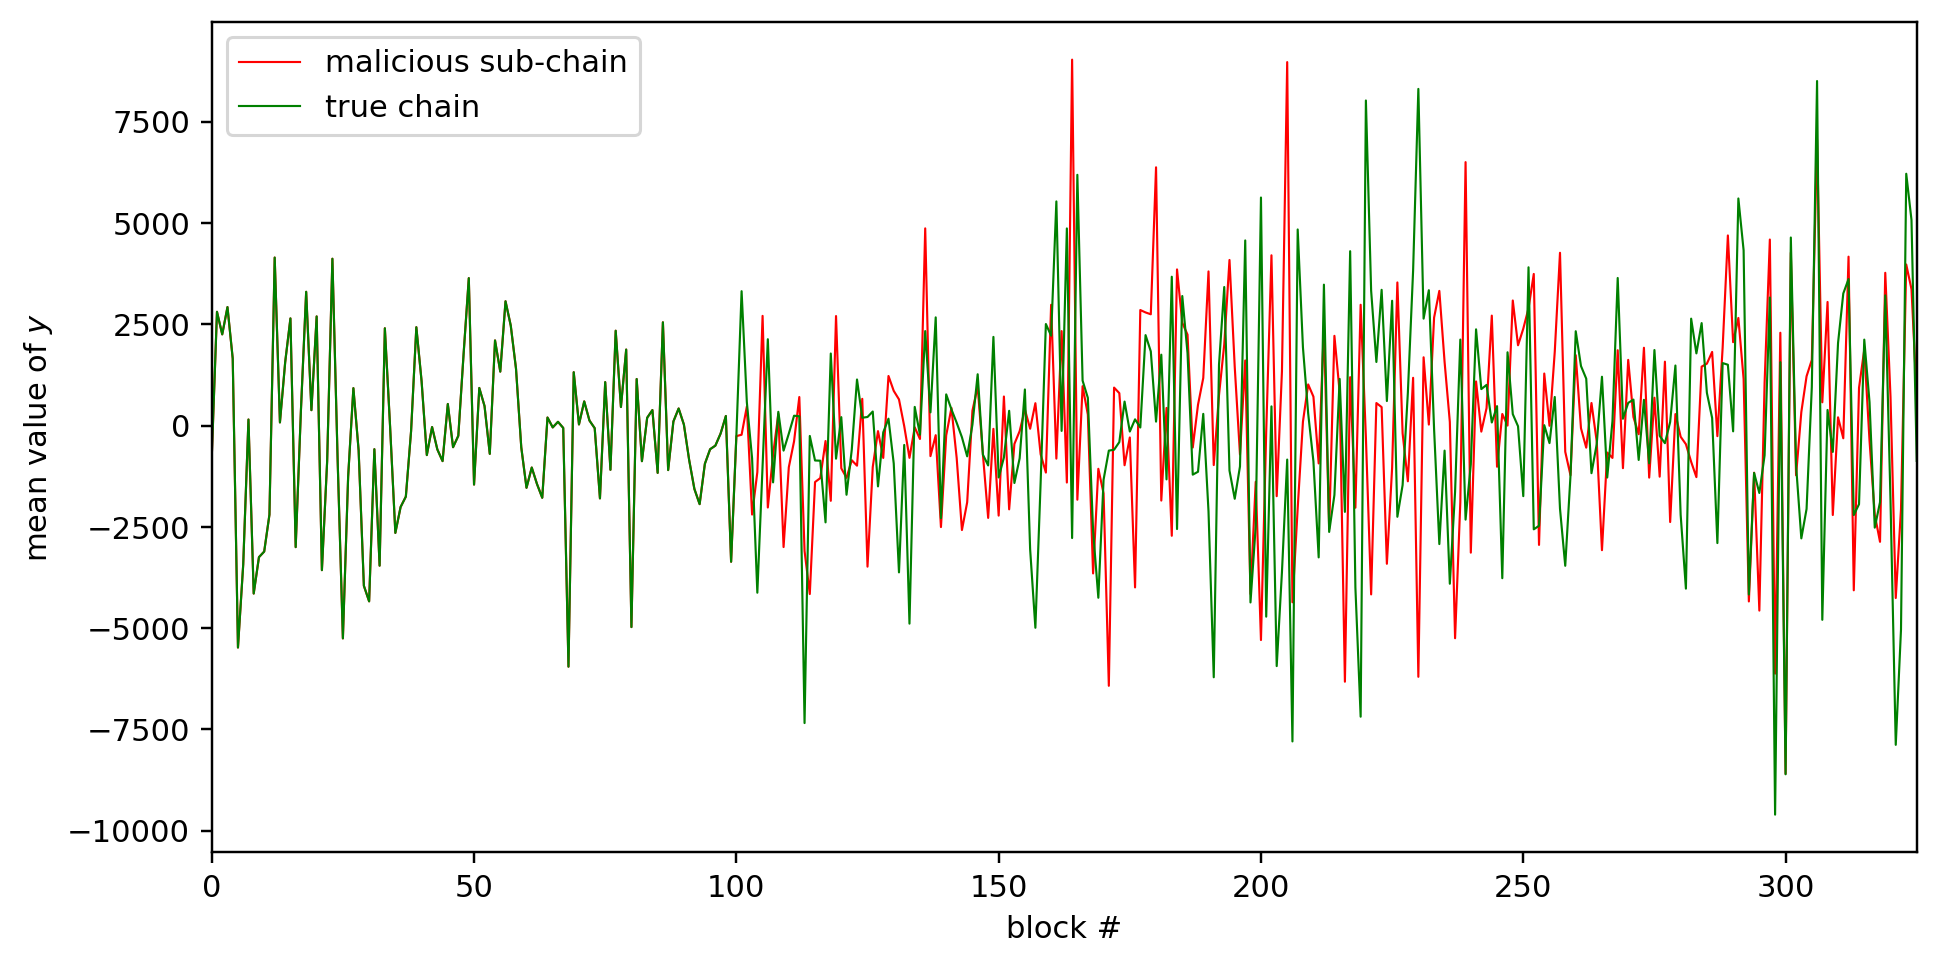

In [19]:
y_idx = 0
plt.plot(cs_blockchain_frauded.mean(axis=1), "r", linewidth=.7, label="malicious sub-chain")
plt.plot(cs_blockchain.mean(axis=1), "g", linewidth=.7, label="true chain")
plt.xlim([0, cs_blockchain.shape[0]-1])
plt.xlabel("block #")
plt.ylabel(r"mean value of $y$")
plt.legend()
plt.show()

In [44]:
injects = list(np.power(10., np.arange(-38, 39)))
l2s = []
l2_vals = []
for idx, inject in enumerate(injects):
    y = np.arange(0, m, dtype=np.float32) + inject
    cs_blockchain_frauded = np.zeros_like(cs_blockchain)
    for jdx, sample in enumerate(sample_list):
        n = sample.size
        y, _ = generate_block(sample, y, m, n)
        cs_blockchain_frauded[jdx] = y
    l2_val = np.linalg.norm(cs_blockchain - cs_blockchain_frauded, ord=2, axis=1)
    l2_vals.append(l2_val)
    l2s.append(l2_val.mean())

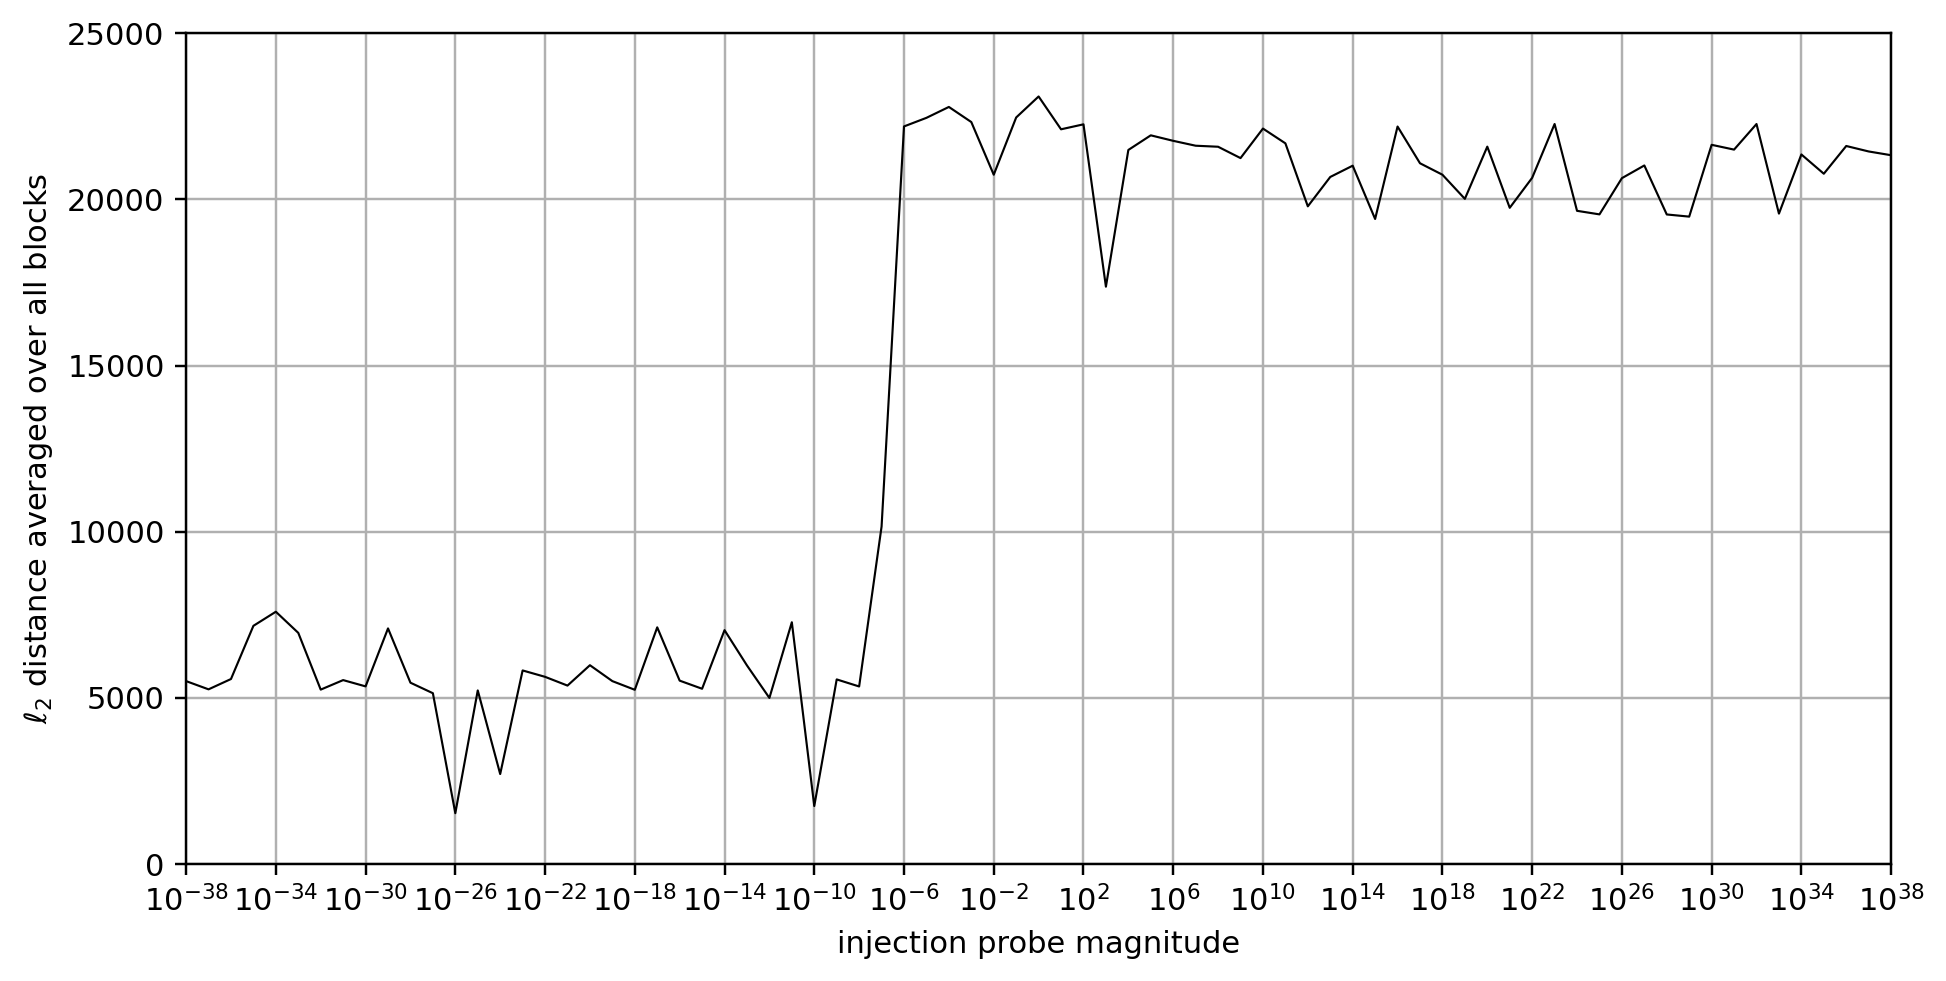

In [45]:
plt.plot(injects, l2s, "k", linewidth=.7)
plt.xscale("log")
plt.xticks(injects[0::4])
plt.xlim([injects[0], injects[-1]])
plt.ylim([0, 25000])
plt.xlabel("injection probe magnitude")
plt.ylabel(r"$\ell_2$ distance averaged over all blocks")
plt.grid()
plt.show()

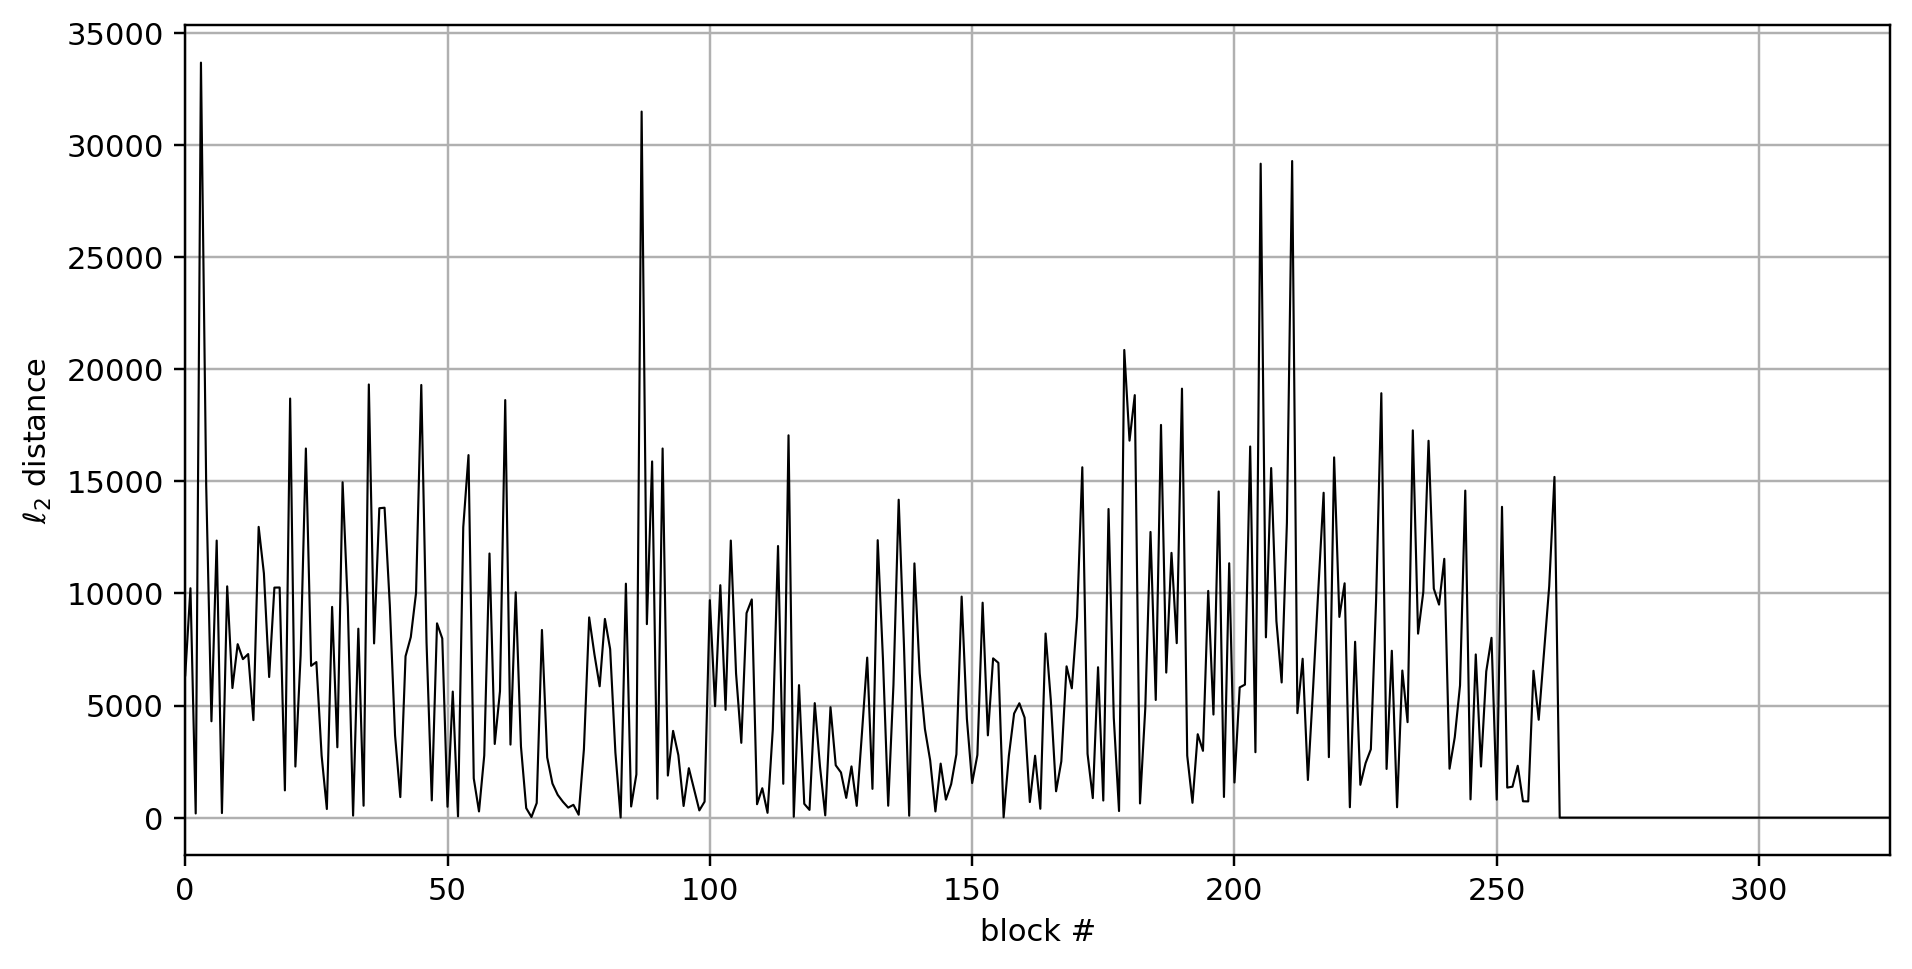

In [64]:
plt.plot(l2_vals[30], "k", linewidth=.7)
plt.xlabel("block #")
plt.ylabel(r"$\ell_2$ distance")
plt.xlim([0, cs_blockchain.shape[0]-1])
plt.grid()
plt.show()

In [66]:
print(np.argwhere(l2_vals[30]))

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]